First, load in the package. BTW, type ?HCRTools (any time after loading the package) for the docs!

In [11]:
library(HCRTools)

Load in your data from SQL Server.
First, set up your connection by specifying your server:

In [12]:
connection.string = 'driver={SQL Server};
                     server=localhost;
                     trusted_connection=true'

Second, specify our query and pull in the dataframe.

In [13]:
query = "SELECT
           [MaritalStatus]
           ,[Gender]
           ,[SalariedFlag]
           ,[VacationHours]
           ,[SickLeaveHours]
         FROM [AdventureWorks2012].[HumanResources].[Employee]
         --WHERE InTestWindow = 'N'" # Only grab training set for THIS example 
                                     # This means rows where predicted col isn't NULL

df <- SelectData(connection.string, query)

If you're instead pulling data from a CSV file, here's an example:

In [14]:
#setwd('location/of/your/.R file')
#df <- read.csv(file = 'your/path',
#               header = TRUE,
#               na.strings = 'NULL')

Check the data types of the dataframe to make sure factor cols aren't listed as numeric cols, etc.

In [15]:
str(df)

'data.frame':	290 obs. of  5 variables:
 $ MaritalStatus : Factor w/ 2 levels "M","S": 2 2 1 2 1 1 1 2 1 1 ...
 $ Gender        : Factor w/ 2 levels "F","M": 2 1 2 2 1 2 2 1 1 2 ...
 $ SalariedFlag  : int  1 1 1 0 1 1 1 1 1 1 ...
 $ VacationHours : int  99 1 2 48 5 6 61 62 63 16 ...
 $ SickLeaveHours: int  69 20 21 80 22 23 50 51 51 64 ...


Change a column type, if necessary.

In [16]:
df$SalariedFlag      = as.factor(df$SalariedFlag)
df$VacationHours     = as.numeric(df$VacationHours) # only here for demonstration
str(df)

'data.frame':	290 obs. of  5 variables:
 $ MaritalStatus : Factor w/ 2 levels "M","S": 2 2 1 2 1 1 1 2 1 1 ...
 $ Gender        : Factor w/ 2 levels "F","M": 2 1 2 2 1 2 2 1 1 2 ...
 $ SalariedFlag  : Factor w/ 2 levels "0","1": 2 2 2 1 2 2 2 2 2 2 ...
 $ VacationHours : num  99 1 2 48 5 6 61 62 63 16 ...
 $ SickLeaveHours: int  69 20 21 80 22 23 50 51 51 64 ...


Do pre-processing and create object with data split into train and test sets.

In [17]:
set.seed(43) # <-- used to make results reproducible
o <- DevelopSupervisedModel$new(type = 'classification',
                                df = df,
                                #grain.col = OPTIONAL/ENCOURAGED,
                                predicted.col = 'Gender',
                                impute = TRUE)

Now that we've arranged the data and done imputation, let's create a logistic model and
1) See how accurate it is and
2) See which variable are important.

+ Fold1: parameter=none 
- Fold1: parameter=none 
+ Fold2: parameter=none 
- Fold2: parameter=none 
+ Fold3: parameter=none 
- Fold3: parameter=none 
+ Fold4: parameter=none 
- Fold4: parameter=none 
+ Fold5: parameter=none 
- Fold5: parameter=none 
Aggregating results
Fitting final model on full training set
Confusion Matrix and Statistics

          Reference
Prediction  F  M
         F  1  0
         M 15 41
                                          
               Accuracy : 0.7368          
                 95% CI : (0.6034, 0.8446)
    No Information Rate : 0.7193          
    P-Value [Acc > NIR] : 0.4499427       
                                          
                  Kappa : 0.0875          
 Mcnemar's Test P-Value : 0.0003006       
                                          
            Sensitivity : 0.06250         
            Specificity : 1.00000         
         Pos Pred Value : 1.00000         
         Neg Pred Value : 0.73214         
             Prevalence : 

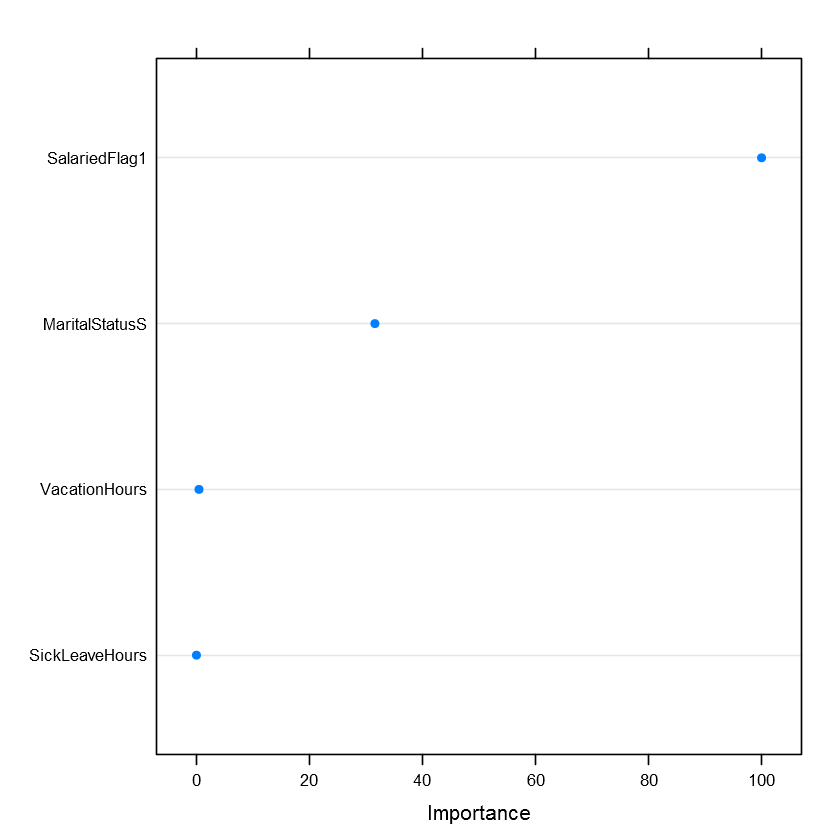

In [18]:
o$logit(cores = 1)

Oh, interesting, so the AUC is around 0.6 and Kappa is near 0.1. That's not great, but maybe random forest will be better. Note that VactionHours and SickLeaveHours aren't helpful at all, so the final model (if logistic is chosen) can leave it out of the query. (See Example 2 for more.)

Now let's see if we can improve on that by testing a random forest model.

Fitting mtry = 2 on full training set
Confusion Matrix and Statistics

          Reference
Prediction  F  M
         F  0  9
         M 16 32
                                          
               Accuracy : 0.5614          
                 95% CI : (0.4236, 0.6926)
    No Information Rate : 0.7193          
    P-Value [Acc > NIR] : 0.9965          
                                          
                  Kappa : -0.2533         
 Mcnemar's Test P-Value : 0.2301          
                                          
            Sensitivity : 0.0000          
            Specificity : 0.7805          
         Pos Pred Value : 0.0000          
         Neg Pred Value : 0.6667          
             Prevalence : 0.2807          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.1579          
      Balanced Accuracy : 0.3902          
                                          
       'Positive' Class : F               
                                         

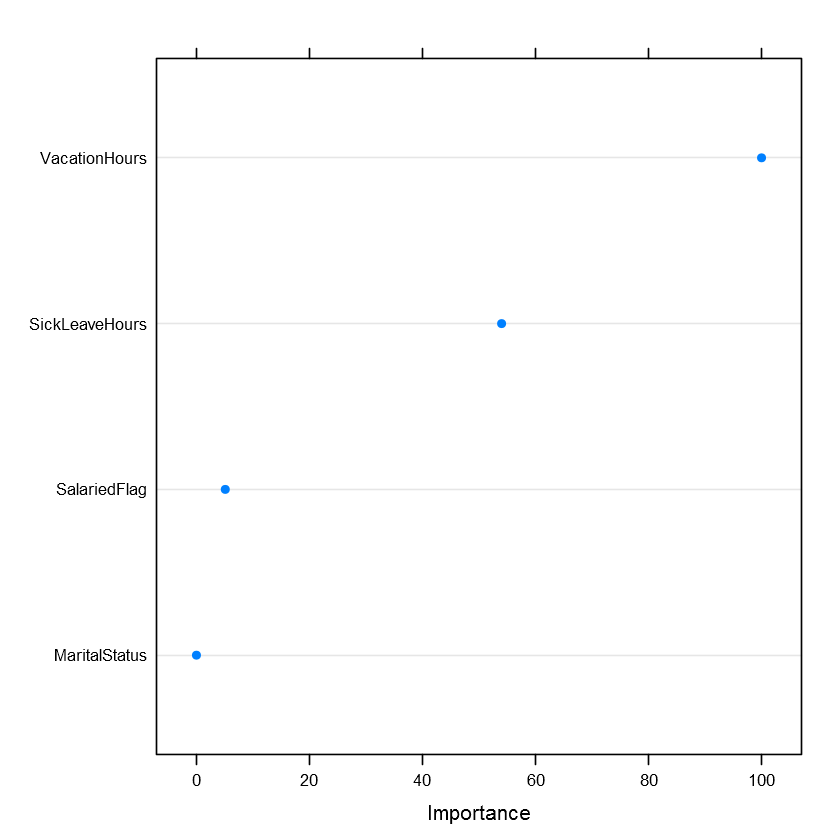

In [19]:
o$randForest(cores = 1)

Oh, interesting--AUC for random forest is even worse than that for logistic. Note that AUC dropped to 0.41 and Kappa is negative.

Let's use a ROC plot for further comparison.

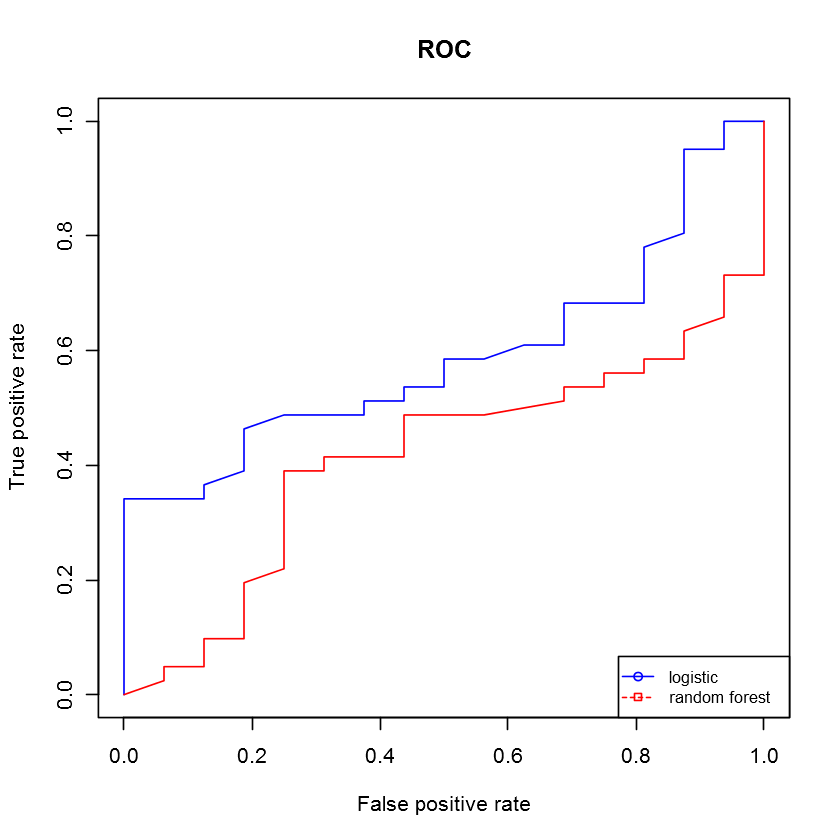

In [20]:
o$plotROC()

Considering the AUC scores and the plot, the logistic model performs slightly better on this data, but neither do well. Considering that it's a small data set, that's not surprising. Let's try to get more data or ask a different business question! 

If the models based on your data are better and you want to set up a model that will 1) predict things that haven't happened yet and 2) move values to SQL Server, see example 2 (linked from the products portal).

Reach out to Levi Thatcher (levi.thatcher@healthcatalyst.com) if you have any questions!